In [1]:
import os  
import numpy as np
import struct
import matplotlib.pyplot as plt
import gc
import random

In [2]:
class readpath(object):
    
    def __init__(self,N):
        self.N = N
        return None
    
    def generate_path(self):
        dict1 = {0:'C:\\Users\\Administrator\\source\\data\\path_slab.dat',1:'C:\\Users\\Administrator\\source\\data\\path_kiwi_hard2.dat'
                ,2:'C:\\Users\\Administrator\\source\\data\\path_kiwi_soft3.dat',3:'C:\\Users\\Administrator\\source\\data\\path090_3.dat'
                ,4:'C:\\Users\\Administrator\\source\\data\\path117_3.dat',5:'C:\\Users\\Administrator\\source\\data\\path138_3.dat'
                ,6:'C:\\Users\\Administrator\\source\\data\\path156_3.dat',7:'C:\\Users\\Administrator\\source\\data\\path175_3.dat'}
        self.dict1 = dict1
        return dict1
    
    def read0(self,i):
        q = 0
        with open(self.dict1[i], "rb") as file0:
            data1 = file0.read(4)
            I = struct.unpack("i", data1)[0]
            data1 = file0.read(4)
            J = struct.unpack("i", data1)[0]
            data1 = file0.read(4)
            K = struct.unpack("i", data1)[0]
            h = []
            for i in range(I):
                a = []
                for j in range(J):
                    l = []
                    while(1):
                        data1 = file0.read(4)
                        f = struct.unpack("4s",data1)[0]
                        if (f!=b'end\x00'):
                            f = struct.unpack("f",data1)[0]
                            l.append(f)
                        else:
                            break
                    
                        

                    a.append(l)
                h.append(a)
                
        return I, h
    
    def read1(self):
        self.generate_path()
        h = [None]*self.N
        I = np.zeros((self.N,))
        for i in range(0,self.N):
            I[i],h[i] = self.read0(i)
            
        self.h = h
        self.I = I
        return h,I
    


In [33]:


def analysis(h,I,indexout):
    eye = [0.0225,0.015,0.015]
    #normal line vector (0.707,0.707,0)
    #euqation of surface : x+y=0.09
    N=200
    time = np.linspace(0, 2e-9, num=N)
    time_per_cell = 2e-9/N
    weight = np.zeros((N,))
    temp = pow(2,0.5)
    radius_fiber = 0.004
    threshold = 0.004
    for j in indexout[1:int(indexout[0])]:
        i=int(j)
        for k in range(len(h[i][0])):

            if((pow(h[i][0][k]-eye[0],2)+pow(h[i][1][k]-eye[1],2)
               +pow(h[i][2][k]-eye[2],2) < pow(radius_fiber,2)) and 
               ((h[i][0][k]-eye[0])<threshold)and((h[i][0][k]-eye[0])>0)):
                
                t = int(h[i][4][k]/time_per_cell)
                if(t<200):
                    weight[t]=weight[t]+h[i][3][k]
                else:
                    weight[0]=-114514
                break;

    return weight

def analysis_g(N, h, I,indexout):
    w2 = np.zeros((N,200))
    for i in range(0,N):
        w2[i] = analysis(h[i],I[i],indexout[:,i])

    return w2

In [4]:
def give_signal():
    N = 1
    s1 = readpath(N)
    h,I = s1.read1()
    

    indexout = np.zeros((5000,N))
    for n in range(N):
        j = 0
        for i in range(int(I[0])):
            if(len(h[n][i][0])!=0):
                if(max(h[n][i][0])>0.0225):
                    indexout[j+1,n] = i
                    j = j+1
        indexout[0,n]=j
    
    ########################################################################
    w2 = analysis_g(N,h,I,indexout)
    return w2
    #####################################################################

    # M=200
    # time = np.linspace(0, 2e-9, num=M)
    # plt.figure(figsize = (10,10))
    # for i in range(N):
    #     plt.subplot(3,3,i+1)
    #     plt.plot(time,w2[i])

    # plt.xlabel('time/s')
    # plt.ylabel('amount of photons')
    # plt.show()

In [43]:
a = np.array([10e-3,0.1e2,140e2,0.85], dtype = np.float32)
with open("C:\\Users\\Administrator\\source\\data\\para.bin", "wb") as file0:
    for i in range(4):
        file0.write(a[i])
    
# b = np.zeros((4,), dtype = np.float32)
# with open("C:\\Users\\Administrator\\source\\data\\para.bin", "rb") as file0:
#     for i in range(4):
#         data1 = file0.read(4)
#         b[i] = struct.unpack("f", data1)[0]

In [44]:
main = "C:\\Users\\Administrator\\source\\repos\\mc_slab_unity\\model_generator_unity_slab0.0\\x64\Debug\\model_generator_slab.exe"
r_v = os.system(main) 
if(r_v!=0):
    print (r_v )

main = "C:\\Users\\Administrator\\source\\repos\\mc_slab_unity\\mc_slab_unity0.0\\x64\\Debug\\mc_slab_unity0.0.exe"
r_v = os.system(main) 
if(r_v!=0):
    print (r_v )

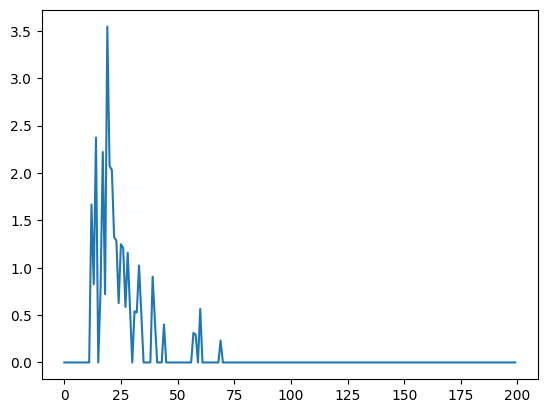

In [45]:
plt.plot(give_signal()[0])
plt.show()

In [46]:
N = 4
M = 10
sig = np.zeros((N,M,200),dtype = np.float32)
a = np.zeros((4,), dtype = np.float32)
an = np.zeros((N,M,4),dtype = np.float32)
for n in range(N):
    a[0] = random.uniform(0.1e-3,20e-3)
    for m in range(M):
        # a[0] = random.uniform(0.1e-3,20e-3)
        a[1] = random.uniform(0.01e2,1e2)
        a[2] = random.uniform(1e2,200e2)
        a[3] = 0.85
        with open("C:\\Users\\Administrator\\source\\data\\para.bin", "wb") as file0:
            for i in range(4):
                file0.write(a[i])
    ################################################################
        main = "C:\\Users\\Administrator\\source\\repos\\mc_slab_unity\\model_generator_unity_slab0.0\\x64\Debug\\model_generator_slab.exe"
        r_v = os.system(main) 
        if(r_v!=0):
            print (r_v )

        main = "C:\\Users\\Administrator\\source\\repos\\mc_slab_unity\\mc_slab_unity0.0\\x64\\Debug\\mc_slab_unity0.0.exe"
        r_v = os.system(main) 
        if(r_v!=0):
            print (r_v )
    ###############################################################
        sig[n,m] = give_signal()[0]
        an[n,m] = a
    print(n)

0
1
2
3


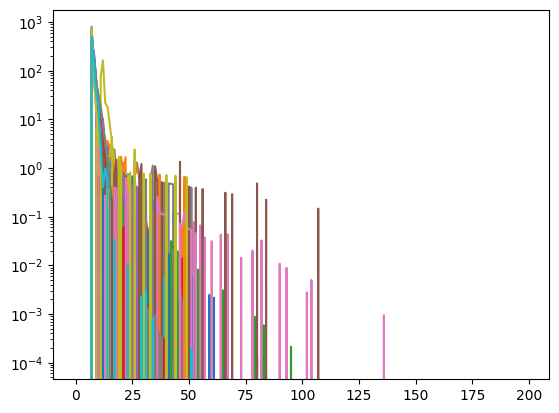

In [47]:
plt.axes(yscale = "log") 
for n in range(N):
    for m in range(M):
        plt.plot(sig[n,m])
plt.show()
#print(an)

In [114]:
# 1 Initial write  !!!: do not use this cell if there is a existing dataset file
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
NM = np.array([N*M],dtype = int)
with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "wb") as file0:
    file0.write(NM[0])
    for i in range(N):
        for j in range(M):
            for k in range(4):
                file0.write(np.float32(an[i,j,k]))
            for k in range(200):
                file0.write(np.float32(sig[i,j,k]))
    # file0.write(b'end\x00')
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

In [48]:
# 2 continually write  !!!: only run this cell for once after calculating new data
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
NM = np.array([N*M],dtype = int)
iv = 0
with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "r+b") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    NM[0] = NM[0]+NM1
    file0.seek(-4,1)
    file0.write(NM[0])
    file0.seek(0,2)
    for i in range(N):
        for j in range(M):
            if(sig[i,j,0]!= -114514):
                for k in range(4):
                    file0.write(np.float32(an[i,j,k]))
                for k in range(200):
                    file0.write(np.float32(sig[i,j,k]))
            else:
                iv = iv+1
                
    if(iv!=0):
        file0.seek(0,0)
        NM[0] = NM[0]-iv
        file0.write(NM[0])
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

In [37]:
# with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "r+b") as file0:
#     patch1 = file0.read()
#     file0.seek(0,0)
#     file0.truncate()
#     file0.write(patch1[0:-1632])
    
    
    

In [49]:
with open("C:\\Users\\Administrator\\source\\data\\dataset.bin", "rb") as file0:
    data1 = file0.read(4)
    NM1 = struct.unpack("i", data1)[0]
    sig1 = np.zeros((NM1,200),dtype = np.float32)
    an1 = np.zeros((NM1,4),dtype = np.float32)
    for i in range(NM1):
        for k in range(4):
            data1 = file0.read(4)
            an1[i,k] = struct.unpack("f", data1)[0]
        for k in range(200):
            data1 = file0.read(4)
            sig1[i,k] = struct.unpack("f", data1)[0]  
    # data1 = file0.read(len('end\0'))
    # end = struct.unpack("4s", data1)[0]  

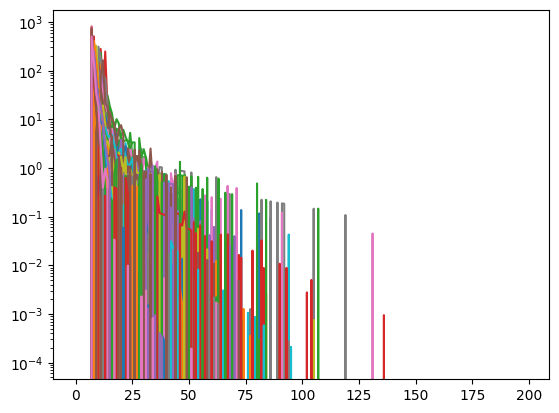

167
[9.169034e-04 7.802959e+01 8.731936e+03 8.500000e-01]


In [50]:
plt.axes(yscale = "log") 
for n in range(NM1):
    plt.plot(sig1[n])
plt.show()
print(NM1)
print(an1[-1])